In [9]:
from sklearn.datasets import make_classification
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
X,y=make_classification(n_samples=100,n_features=2,n_informative=1,n_redundant=0,n_classes=2,\
    n_clusters_per_class=1,random_state=41,hypercube=False,class_sep=10)

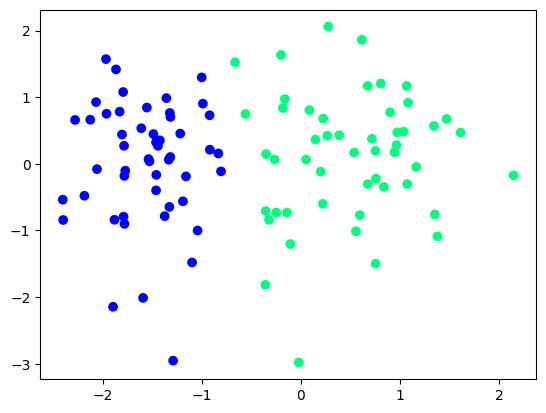

In [10]:
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter')

In [11]:
def step(z):
    return 1 if z>0 else 0

In [15]:
#perceptron function
def perceptron(X,y):
    X=np.insert(X,0,1,axis=1)
    weights=np.ones(X.shape[1])
    lr=0.1
    
    for i in range(1000):
        j=np.random.randint(0,100)
        y_hat=step(np.dot(X[j],weights))
        weights=weights+lr*(y[j]-y_hat)*X[j]
    return weights[0],weights[1:]        

In [16]:

intercept,coeff=perceptron(X,y)

In [17]:
intercept,coeff

(0.9, array([1.39705802, 0.14321906]))

In [18]:
m=-(coeff[0]/coeff[1])
b=-(intercept/coeff[1])

In [19]:
m,b

(-9.75469314070507, -6.284079620921989)

In [20]:
X_input=np.linspace(-3,3,100)
y_input=m*X_input+b

(-3.0, 2.0)

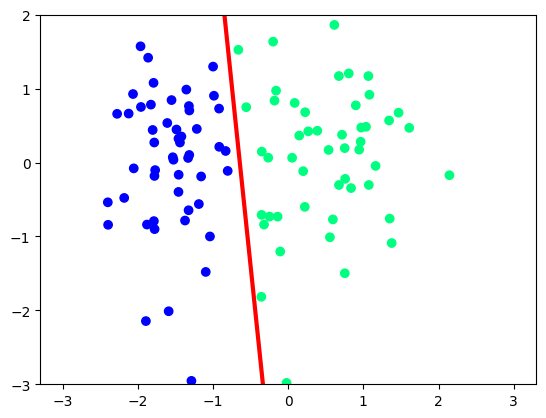

In [30]:
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter')
plt.plot(X_input,y_input,'r',linewidth=3)
plt.ylim(-3,2)